In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mnso
import math

# Loading the dataset
data = pd.read_csv('marketing_campaign.csv', sep='\t')
display(data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Data Cleaning

Handling missing values

In [2]:
# Checking missing values
print(data.isna().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [3]:
# Handling missing values
data.dropna(inplace=True)
print("The shape of data-points after removing the rows with missing values are:", data.shape)

The shape of data-points after removing the rows with missing values are: (2216, 29)


## Feature Engineering

Convert column type

In [4]:
data['Age'] = 2022 - data['Year_Birth']

Binning

In [5]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'Relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

data['Education'] = data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
data['Education'] = data['Education'].replace(['Basic'], 'Under Graduate')

print(data['Education'].value_counts())
print(data['Marital_Status'].value_counts())

Post Graduate     2162
Under Graduate      54
Name: Education, dtype: int64
Relationship    1430
Single           786
Name: Marital_Status, dtype: int64


Feature Extraction

In [6]:
# Create feature 'Kids'
data['Kids'] = data['Kidhome'] + data['Teenhome']

# Create feature 'Total_Spent'
data['Total_Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Create feature 'Total_Spent'
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

# Create feature 'TotalPurchases'
data['TotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

Drop Column

In [7]:
data.drop(['Kidhome', 'Teenhome', 'Year_Birth'], axis = 1, inplace = True)
display(data.head())

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids,Total_Spent,TotalAcceptedCmp,TotalPurchases
0,5524,Post Graduate,Single,58138.0,04-09-2012,58,635,88,546,172,...,0,0,3,11,1,65,0,1617,0,22
1,2174,Post Graduate,Single,46344.0,08-03-2014,38,11,1,6,2,...,0,0,3,11,0,68,2,27,0,4
2,4141,Post Graduate,Relationship,71613.0,21-08-2013,26,426,49,127,111,...,0,0,3,11,0,57,0,776,0,20
3,6182,Post Graduate,Relationship,26646.0,10-02-2014,26,11,4,20,10,...,0,0,3,11,0,38,1,53,0,6
4,5324,Post Graduate,Relationship,58293.0,19-01-2014,94,173,43,118,46,...,0,0,3,11,0,41,1,422,0,14


In [8]:
data.drop('Dt_Customer', axis = 1, inplace = True)

In [9]:
# Categiral Encoding
import category_encoders as ce

cat = []
for column in data :
    if data[column].dtypes == 'object' :
        cat.append(column)

encoder = ce.OneHotEncoder(cols=cat)
data_cs = encoder.fit_transform(data)

In [10]:
# Feature scalling
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
data_cs = SS.fit_transform(data_cs)

In [ ]:
data['Income'] = data['Income'].astype('int')
data.drop('ID', axis = 1, inplace=True)

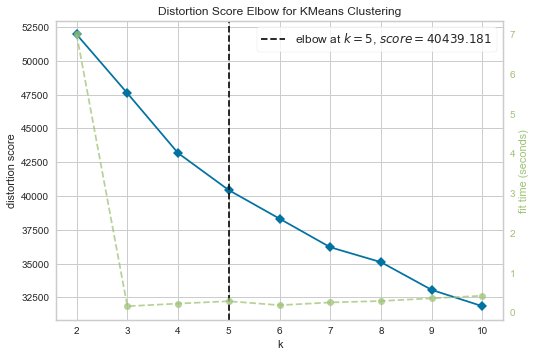

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Quick examination of elbow method to find numbers of clusters to make.
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data_cs)
Elbow_M.show()